<div style="text-align: justify;">
  <img style="float: right; margin: 30px 15px 15px 15px;" src="https://th.bing.com/th/id/OIP.m4B6tO12qXHJ5rP-cchCgQHaHa?pid=ImgDet&rs=1" width="200" height="200" />
  <h1>Proyecto Final</h1>
  <h2>Asignacion crediticia a usuarios</h2>
  <p><strong>Integrantes:</strong></p>
  <ul>
    <li>Ricardo Rodriguez Salcedo</li>
    <li>Abdon Islas Leon</li>
    <li>Emilio Bravo Lizarraga</li>
    <li>Fernanda Montejano</li>
    <li>Maria Jose Elizalde</li>
    <li>Pablo Magallon</li>
  </ul>
</div>

In [2]:
#Llamado de librerias 
import pandas as pd
import numpy as np

**Importamos Base de Datos de Kaggle - Credit Score Clasification**
* Esta base de datos contiene informacion crediticia con credit score (Bueno, Standard o Malo) de 100,000 personas diferentes
* Se utiliza para entrenar un modelo de Random Forest el cual se utilizara para calificar a las personas y tener una mejor idea de su score para determinar el prestamo que podemos otorgar.

In [3]:
df = pd.read_csv('train-1.csv', dtype='str')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,_,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377861869582354,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,Good,809.98,24.797346908844986,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Primero hacemos limpieza de la base de entranamiento

In [3]:
df['ID'] = df['ID'].str[2:]

df['Annual_Income'] = df['Annual_Income'].str.extract('(\d+\.\d+)').fillna(0).astype(float)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].str.extract('(\d+\.\d+)').fillna(0).astype(float)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].str.extract('(\d)').fillna(0).astype(int)

# Funcion para limpiar columnas
def clean_str(num, mode_value, digits):
    cleaned_str = ''.join(filter(str.isdigit, num))
    return mode_value if len(cleaned_str) > digits else cleaned_str

mode_value = df['Age'].mode().values[0]
df['Age'] = df['Age'].apply(lambda x: clean_str(x, mode_value,2))
df['Age'].fillna(mode_value, inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')


mode_value = df['Num_Credit_Card'].mode().values[0]
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: clean_str(x, mode_value,2)).astype(int)

mode_value = df['Interest_Rate'].mode().values[0]
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: clean_str(x, mode_value,2)).astype(int)

mode_value = df['Num_of_Loan'].mode().values[0]
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: clean_str(x, mode_value,2)).astype(int)

mode_value = df['Delay_from_due_date'].mode().values[0]
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: clean_str(x, mode_value,3)).astype(int)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)
mode_value = df['Num_of_Delayed_Payment'].mode().values[0]
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: clean_str(x, mode_value,3))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace('nan', '0')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace('', '0').astype(int)

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(str)
mode_value = df['Num_Credit_Inquiries'].mode().values[0]
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna('0')
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].replace('', '0').astype(float)

df['Outstanding_Debt'] = df['Outstanding_Debt'].str.extract('(\d+\.\d+)').fillna(0).astype(float)

df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].str.extract('(\d+\.\d+)').fillna(0).astype(float)

df['Total_EMI_per_month'] = df['Total_EMI_per_month'].str.extract('(\d+\.\d+)').fillna(0).astype(float)

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.extract('(\d+\.\d+)').fillna(0).astype(float)

df['Monthly_Balance'] = df['Monthly_Balance'].str.extract('(\d+\.\d+)').fillna(0).astype(float)

# Función para convertir el formato en meses
def convert_to_months(text):
    if pd.notna(text) and text != 'nan':  # Verifica si el valor no es 'nan'
        parts = text.split()
        years = int(parts[0])
        months = int(parts[3])
        total_months = (years * 12) + months
        return total_months
    else:
        return 0 

# Aplicar la función a la columna
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

df['Credit_Mix'] = np.where(df['Credit_Mix'] == '_', 'Good', df['Credit_Mix'])

df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,1604,CUS_0xd40,March,Aaron Maashoh,38,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


**Transformaremos variables categoricas a Boleano**

In [4]:
df["Payment_of_Min_Amount"] = [1 if i == "Yes" else (0 if i == "No" else 2) for i in df["Payment_of_Min_Amount"]]

df["Payment_Behaviour"] = [0 if i=="Low_spent_Large_value_payments" else (1 if i == "High_spent_Large_value_payments" else (2 if i=='Low_spent_Medium_value_payments' else (3 if i=='High_spent_Medium_value_payments' else (4 if i=='Low_spent_Small_value_payments' else 5)))) for i in df["Payment_Behaviour"]]

df["Credit_Mix"] = [0 if i == "Good" else (1 if i == "Standard" else 2) for i in df["Credit_Mix"]]

df["Credit_Score"] = [0 if i == "Poor" else (1 if i == "Standard" else 2) for i in df["Credit_Score"]]

df['Num_Credit_Inquiries'] = np.where(df['Num_Credit_Inquiries'].isnull(), 0, df['Num_Credit_Inquiries'])

train = df

## <font color='navy'> Exploratory Data Analysis  <font color='black'>
 
Un análisis exploratorio de datos, es un tipo de análisis que busca obtener un resumen de las características principales de una base de datos haciendo uso de la información clave de la misma, utilizando herramientas como visualizaciones y gráficas. 
    
Despúes de haber entendido la base de datos, podemos pasar a obtener **insights** de la base de datos, es decir, transformar nuestros datos de alguna forma para obtener información de la misma. 
    
La preguntas claves aquí son:
    
+ ¿Qué variables contienen información clave? ¿Qué transformaciones me podrían ayudar a entender mejor estas variables?

In [5]:
# Descripcion rapida de nuestra data
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.45248,1.764157e+05,3564.961339,4.867380,5.593130,14.414040,3.527180,21.095040,13.102360,27.208880,0.744570,1426.220376,32.285173,201.221460,0.763400,1403.118217,178.363270,2.908150,397.684413,0.88830
std,10.65391,1.429618e+06,3295.207286,2.533151,2.938471,8.753774,2.595116,14.822802,23.740885,191.308723,0.754964,1155.129026,5.116875,114.320699,0.648664,8306.041270,198.472368,1.621734,217.132017,0.67512
min,14.00000,7.005930e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25.00000,1.945750e+04,1183.864167,3.000000,4.000000,8.000000,2.000000,10.000000,8.000000,3.000000,0.000000,566.072500,28.052567,114.000000,0.000000,30.306660,58.325837,2.000000,267.871374,0.00000
50%,34.00000,3.757861e+04,2623.714167,5.000000,5.000000,13.000000,3.000000,18.000000,13.000000,5.000000,1.000000,1166.155000,32.305784,208.000000,1.000000,69.249473,116.545252,3.000000,334.806633,1.00000
75%,41.00000,7.279092e+04,5371.525000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,9.000000,1.000000,1945.962500,36.496663,292.000000,1.000000,161.224249,220.039055,4.000000,467.670597,1.00000
max,99.00000,2.419806e+07,15204.633333,9.000000,99.000000,99.000000,95.000000,67.000000,996.000000,2597.000000,2.000000,4998.070000,50.000000,404.000000,2.000000,82331.000000,1977.326102,5.000000,1602.040519,2.00000


In [6]:
# informacion de nuestros datos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int8   
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

**Entrenamos y evaluamos un modelo de Random Forest utilizando la biblioteca Scikit-learn.**


* **Codificación de características categóricas:**
En el primer paso, se utilizó pd.get_dummies de Pandas para convertir las variables categóricas en variables ficticias (variables binarias) que representan las categorías como columnas separadas de 0s y 1s.

* **Selección de columnas para entrenar el modelo:**
Se eligen las columnas específicas del conjunto de datos que se utilizarán como características para entrenar el modelo. Las columnas seleccionadas incluyen características como historial crediticio, edad del historial crediticio, mezcla de créditos, consultas de crédito, deudas pendientes, etc.

* **División del conjunto de datos:**
Se divide el conjunto de datos en dos partes: el conjunto de características (X) y la variable objetivo (y). Las características son las columnas seleccionadas, y la variable objetivo es la columna 'Credit_Score'.

* **Imputación de valores faltantes:**
Se utiliza SimpleImputer de Scikit-learn para completar los valores faltantes en las características. En este caso, se usa la estrategia de imputación de 'mean' (media) para reemplazar los valores faltantes por la media de la columna.

* **Entrenamiento del modelo Random Forest:**
Se utiliza RandomForestClassifier de Scikit-learn para entrenar el modelo. Se especifica el número de árboles en el bosque (n_estimators=100) y el random_state para asegurar reproducibilidad.

* **Predicción y Evaluación:**
Se hacen predicciones en el conjunto de prueba utilizando el modelo entrenado y se evalúa el rendimiento del modelo utilizando la precisión (accuracy_score) en las predicciones comparadas con los valores reales.

* **Uso del modelo para predecir en todo el conjunto de datos:**
Finalmente, se rellenan los valores faltantes en el conjunto original y se utiliza el modelo entrenado para predecir la columna 'FICO_Score' en el DataFrame original (df).

In [7]:
# Codificar las características categóricas
df_encoded = pd.get_dummies(df, columns=['Credit_Mix','Credit_Score'])

# Seleccionar las columnas para entrenar el modelo
columns_to_train = [
    'Delay_from_due_date',
    'Credit_History_Age',
    'Credit_Mix_0',
    'Credit_Mix_1',
    'Credit_Mix_2',
    'Annual_Income',
    'Num_of_Loan',
    'Outstanding_Debt'
]

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df_encoded[columns_to_train]
y = df['Credit_Score']  # Reemplaza 'Target_Column' con el nombre de tu variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valores faltantes en las características
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia según tus necesidades
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_imputed)

# Evaluar el rendimiento del modelo (por ejemplo, precisión)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
X = X.fillna(0)
df['Score_Prediction_RF'] = model.predict(X)
print(f'Precisión del modelo: {accuracy}')
df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Precisión del modelo: 0.7707


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Score_Prediction_RF
0,1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,265,0,49.574949,80.415295,5,312.494089,2,2
1,1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,...,809.98,31.944960,0,0,49.574949,118.280222,0,284.629162,2,2
2,1604,CUS_0xd40,March,Aaron Maashoh,38,821-00-0265,Scientist,19114.12,0.000000,3,...,809.98,28.609352,267,0,49.574949,81.699521,2,331.209863,2,2
3,1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,0.000000,3,...,809.98,31.377862,268,0,49.574949,199.458074,4,223.451310,2,2
4,1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,269,0,49.574949,41.420153,3,341.489231,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,34.663572,378,0,35.104023,60.971333,1,479.866228,0,0
99996,25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,40.565631,379,0,35.104023,54.185950,3,496.651610,0,0
99997,25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,41.255522,380,0,35.104023,24.028477,1,516.809083,0,0
99998,25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,502.38,33.638208,381,0,35.104023,251.672582,0,319.164979,1,1


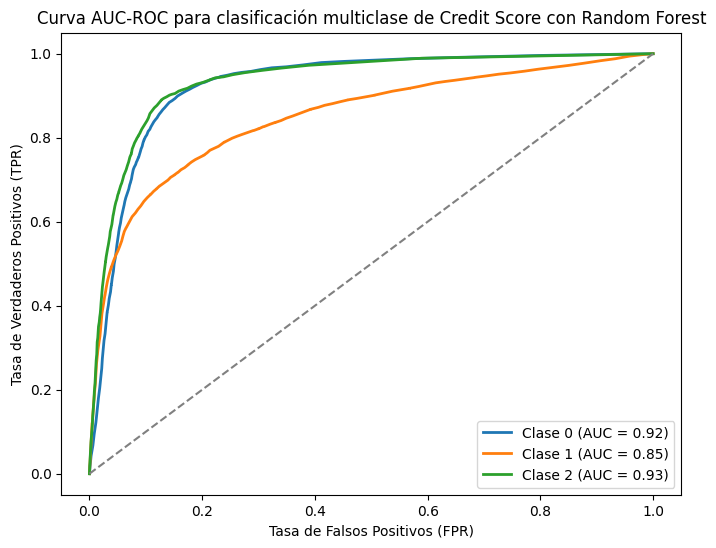

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Crear y entrenar el clasificador RandomForest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_imputed, y_train)

# Calcular las probabilidades de predicción para cada clase
y_score = classifier.predict_proba(X_test_imputed)

# Binarizar las etiquetas
y_bin = label_binarize(y_test, classes=np.unique(y_test))

n_classes = len(np.unique(y_test))

# Calcular y graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Clase %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva AUC-ROC para clasificación multiclase de Credit Score con Random Forest')
plt.legend(loc='lower right')
plt.show()


El modelo de Random Forest destaca tener un rendimiento equilibrado y consistente en la clasificación de las diferentes categorías de crédito, mostrando AUC-ROC altos para cada una de ellas. Esto es crucial, ya que brinda una mayor confianza en la capacidad del modelo para distinguir y clasificar correctamente los diferentes niveles de crédito. Por lo tanto, debido a su rendimiento en las métricas AUC-ROC,me inclino por el modelo de Random Forest como la mejor opción para este escenario de clasificación de créditos.

In [9]:
from joblib import dump

# Guardar el modelo entrenado
dump(model, 'Random_Forest_model.joblib')

#### Creamos Clase de Preguntas que vamos utilizar para obtener informacion necesaria de los clientes con la cual calculareos ciertos factores que influiran tanto en la clasificacion de su Score Crediticio como en la cantidad de credito que otorgaremos a cada usuario dependiendo de sus respuestas:

**Obtención de Datos Personales:**
1. **Nombre:**
   - *Apellido Paterno:* 
   - *Apellido Materno:* 
   - *Nombres:* 

2. **Edad:** 

3. **CURP (Clave Única de Registro de Población):** 

4. **Domicilio:** 



#### Finanzas y Tarjetas de Crédito:

5. **Ingresos Mensuales en MXN:** 

6. **Egresos Mensuales en MXN:** 

7. **Número de Tarjetas de Crédito Actualmente:** 

8. **Porcentaje de Utilización de Tarjeta de Crédito al Mes (0-100):** 

9. **Tiempo con las Tarjetas de Crédito (Meses):** 

10. **Respuesta ante Escenario de Incapacidad para Pagar la Tarjeta de Crédito:**
    - a) Pido prestado a alguien más para pagarla
    - b) Pago el siguiente mes aunque sea con intereses
    - c) Pago cuando tenga el dinero y me sea posible
    - d) Pago el mínimo


11. **Tiempo que Tardas en Pagar tu Tarjeta Después de la Fecha de Corte (Días):** 

12. **¿Tienes Préstamos Activos?**
    - a) Sí
    - b) No

13. **Cantidad de prestamos que tienes a parte de tus tarjeta de Crédito:**

14. **Monto de Préstamos Activos (En caso de tenerlos):** 

15. **Tipo de mejor Tarjeta de Crédito :**
    - a) Clásica
    - b) Gold
    - c) Platinum
    - d) Black

16. **Límite de Crédito (Total de Todas las Tarjetas):** 

17. **¿Acostumbras a Invertir Dinero?**
    - a) Sí
    - b) No

18. **Porcentaje de Inversión Mensual (En caso de Invertir):** 


In [10]:
import re
from datetime import datetime

class Preguntas:
    def __init__(self):
        self.paterno = None
        self.materno = None
        self.nombres = None
        self.edad = None
        self.curp = None
        self.domicilio = None
        self.ingresos = None
        self.egresos = None
        self.num_tarjetas = None
        self.credit_utilization = None
        self.meses = None
        self.respuesta_retorica = None
        self.dias_pago = None
        self.tiene_prestamos = None
        self.cantidad_prestamos = 0
        self.monto_prestamo = 0
        self.tipo_tarjeta = None
        self.credito_total = None
        self.invierte = None
        self.porcentaje_inversion = None

    def obtener_nombre(self):
        self.paterno = input("Por favor, ingresa tu Apellido Paterno: ")
        self.materno = input("Por favor, ingresa tu Apellido Materno: ")
        self.nombres = input("Por favor, ingresa tus Nombres: ")

    def obtener_edad(self):
        while True:
            try:
                entrada = input("Por favor, ingresa tu edad: ")
                self.edad = int(entrada)
                break
            except ValueError:
                print("Error: Ingresa solo valores numéricos enteros.")

    def validar_curp(self, curp):
        if len(curp) != 18:
            return False
        if not re.match(r'^[A-Z&]{4}\d{6}[HM]{1}[A-Z0-9]{5}[A-Z0-9]{1}\d{1}$', curp):
            return False
        return True

    def obtener_curp(self):
        while True:
            curp_usuario = input("Por favor, ingresa tu CURP: ")
            if self.validar_curp(curp_usuario.upper()):
                self.curp = curp_usuario
                break
            else:
                print("Error: La CURP ingresada no es válida. Verifica el formato.")

    def obtener_domicilio(self):
        self.domicilio = input("Por favor, ingresa tu domicilio: ")

    def obtener_ingresos(self):
        while True:
            try:
                self.ingresos = int(input("Por favor, ingresa tus ingresos mensuales en MXN (Solo valores numéricos): "))
                break
            except ValueError:
                print("Error: Ingresa solo valores numéricos.")

    def obtener_egresos(self):
        while True:
            try:
                self.egresos = int(input("Por favor, ingresa tus egresos mensuales en MXN (Solo valores numéricos): "))
                break
            except ValueError:
                print("Error: Ingresa solo valores numéricos.")

    def obtener_numero_tarjetas(self):
        while True:
            try:
                self.num_tarjetas = int(input("¿Con cuántas tarjetas de crédito cuentas actualmente?: "))
                if self.num_tarjetas >= 0:
                    break
                else:
                    print("Error: Ingresa un valor igual o mayor que cero.")
            except ValueError:
                print("Error: Ingresa solo valores numéricos enteros.")

    def porcentaje(self):
        while True:
            try:
                credit_utilization = float(input("Aproximadamente, ¿Cuánto porcentaje utilizas de tu tarjeta de crédito al mes de 0 a 100?, ej: 20% = 20, ingresa un numero entero: "))
                if 0 <= credit_utilization <= 100:  # Cambio aquí: uso la variable local en lugar de self.credit_utilization
                    self.credit_utilization = credit_utilization  # Asigno el valor ingresado al atributo de la clase
                    break
                else:
                    print("Error: Ingresa un valor entre 0 y 100.")
            except ValueError:
                print("Error: Ingresa solo valores numéricos.")


    def meses_tarjeta(self):
        while True:
            try:
                self.meses = int(input("¿Cuántos meses llevas con tu/tus tarjetas de crédito?: "))
                if self.meses > 0:
                    break
                else:
                    print("Error: Ingresa un valor mayor que cero.")
            except ValueError:
                print("Error: Ingresa solo valores numéricos enteros.")

    def obtener_respuesta_pregunta_retorica(self):
        print("En un escenario en donde no tuvieras el dinero para pagar tu tarjeta de crédito, ¿Qué harías?")
        print("a) Pido prestado a alguien más para pagarla")
        print("b) Pago el siguiente mes aunque sea con intereses")
        print("c) Pago cuando tenga el dinero y me sea posible")
        print("d) Pago el mínimo")

        while True:
            respuesta = input("Ingresa la letra de tu opción elegida: ")
            if respuesta.lower() in ['a', 'b', 'c', 'd']:
                print("¡Bien! Gracias por responder.")
                self.respuesta_retorica = respuesta.lower()
                break
            else:
                print("Error: Opción no válida. Por favor, elige entre a, b, c o d.")

    def tiempo_pago(self):
        while True:
            try:
                self.dias_pago = int(input("Después de tu fecha de corte, ¿Cuántos días tardas en pagar tu tarjeta de crédito? Responde únicamente con números: "))
                if self.dias_pago >= 0:
                    break
                else:
                    print("Error: Ingresa un valor igual o mayor que cero.")
            except ValueError:
                print("Error: Ingresa solo valores numéricos enteros.")

    def prestamos_activos(self):
        print("Actualmente, ¿Tienes préstamos activos a parte de Tarjetas de credito?: ")
        print("a) Si")
        print("b) No")

        while True:
            tiene_prestamos = input('Ingrese la letra de la opcion correcta: ')
            if tiene_prestamos == 'a':
                self.tiene_prestamos = True
                self.cantidad_prestamos = input("¿Cuántos préstamos tienes a tu nombre, a parte de las tarjetas de Crédito? ")
                self.monto_prestamo = input("¿De cuánto es el monto de tus préstamos? (Si es mas de uno, favor de sumarlos y poner el monto total): ")
                print(f"Entendido, tienes préstamos por un monto de {self.monto_prestamo}.")
                break
            elif tiene_prestamos == 'b':
                self.tiene_prestamos = False
                print("Gracias por la información. No tienes préstamos activos.")
                break
            else:
                print("Error: Opción no válida. Por favor, elige entre a, b.")

    def obtener_tipo_tarjeta(self):
        print("Actualmente, ¿Que tipo de Tarjeta es la mejor que tienes?: ")
        print("a) Clasica")
        print("b) Gold")
        print("c) Platinum")

        while True:
            tipo_tarjeta = input("Ingresa la letra de tu opción elegida: ")
            if tipo_tarjeta.lower() in ['a', 'b', 'c']:
                print("¡Bien! Gracias por responder.")
                self.tipo_tarjeta = tipo_tarjeta.lower()
                break
            else:
                print("Error: Opción no válida. Por favor, elige entre a, b, c.")

    def limite_credito(self):
        while True:
            try:
                self.credito_total = int(input("¿Cuál es tu límite de crédito? (Si tienes más de una tarjeta, suma el total de todas tus líneas de crédito) Por favor, responde solo con valores numéricos: "))
                if self.credito_total >= 0:
                    print(f"Tu límite de crédito es: {self.credito_total}")
                    break
                else:
                    print("Error: Ingresa un valor igual o mayor que cero.")
            except ValueError:
                print("Error: Ingresa solo valores numéricos enteros.")

    def invierte_usuario(self):
        print("¿Acostumbras a invertir dinero?: ")
        print("a) Si")
        print("b) No")

        while True:
            invierte = input('Ingrese la letra de la opcion correcta: ')
            if invierte == 'a':
                porcentaje_inversion = input("¿Qué porcentaje de tus ingresos mensuales sueles invertir? Ingrese el porcentaje en valor entero de 0 a 100 (sin el símbolo de porcentaje): ")

                try:
                    self.porcentaje_inversion = int(porcentaje_inversion)
                    if 0 <= self.porcentaje_inversion <= 100:
                        print(f"Entendido, inviertes un {self.porcentaje_inversion}% de tus ingresos.")
                        self.invierte = True
                        break
                    else:
                        print("Error: Porcentaje no válido. Por favor, ingresa un valor entre 0 y 100.")
                except ValueError:
                    print("Error: Ingresa un número válido para el porcentaje.")
            elif invierte == 'b':
                print("Gracias por la información.")
                self.invierte = False
                break
            else:
                print("Error: Opción no válida. Por favor, elige entre a, b")
                
    def validar_datos(self):
        # Verificar nombre en CURP
        curp_lower = self.curp.lower()
        if not (curp_lower.startswith(self.paterno.lower()[:2]) and
                curp_lower[2] == self.materno.lower()[0] and
                curp_lower[3] == self.nombres.lower()[0]):
            raise ValueError("Verifica tus datos, tu nombre o apellidos están incorrectos.")

        # Calcular edad a partir de la CURP
        curp_year = int(self.curp[4:6])
        curp_month = int(self.curp[6:8])
        curp_day = int(self.curp[8:10])

        today = datetime.now()
        year_now = today.year % 100
        month_now = today.month
        day_now = today.day

        if curp_year > year_now:
            curp_year += 1900
        else:
            curp_year += 2000

        age = today.year - curp_year - ((today.month, today.day) < (curp_month, curp_day))

        if age != self.edad:
            raise ValueError("Verifica tu edad, parece estar incorrecta.")

    
    # Uso de la clase Preguntas:
    def iniciar_cuestionario(self):
        self.obtener_nombre()
        self.obtener_edad()
        self.obtener_curp()
        self.obtener_domicilio()
        self.obtener_ingresos()
        self.obtener_egresos()
        self.obtener_numero_tarjetas()
        self.porcentaje()
        self.meses_tarjeta()
        self.obtener_respuesta_pregunta_retorica()
        self.tiempo_pago()
        self.prestamos_activos()
        self.obtener_tipo_tarjeta()
        self.limite_credito()
        self.invierte_usuario()
        try:
            self.validar_datos()
            print("¡Tus datos han sido verificados con éxito!")
        except ValueError as e:
            print(str(e))

preguntas = Preguntas()
preguntas.iniciar_cuestionario()

# Acceso a las respuestas:
paterno = preguntas.paterno
materno = preguntas.materno
nombres = preguntas.nombres
edad = preguntas.edad
curp = preguntas.curp
domicilio = preguntas.domicilio
ingresos = preguntas.ingresos
egresos = preguntas.egresos
num_tarjetas = preguntas.num_tarjetas
porcentaje = preguntas.credit_utilization
meses = preguntas.meses
respuesta_retorica = preguntas.respuesta_retorica
dias_pago = preguntas.dias_pago
tiene_prestamos = preguntas.tiene_prestamos
num_prestamos = preguntas.cantidad_prestamos
monto_prestamo = preguntas.monto_prestamo
tipo_tarjeta = preguntas.tipo_tarjeta
credito_total = preguntas.credito_total
invierte = preguntas.invierte
porcentaje_inversion = preguntas.porcentaje_inversion


En un escenario en donde no tuvieras el dinero para pagar tu tarjeta de crédito, ¿Qué harías?
a) Pido prestado a alguien más para pagarla
b) Pago el siguiente mes aunque sea con intereses
c) Pago cuando tenga el dinero y me sea posible
d) Pago el mínimo
¡Bien! Gracias por responder.
Actualmente, ¿Tienes préstamos activos a parte de Tarjetas de credito?: 
a) Si
b) No
Entendido, tienes préstamos por un monto de 300000.
Actualmente, ¿Que tipo de Tarjeta es la mejor que tienes?: 
a) Clasica
b) Gold
c) Platinum
¡Bien! Gracias por responder.
Tu límite de crédito es: 75000
¿Acostumbras a invertir dinero?: 
a) Si
b) No
Gracias por la información.
¡Tus datos han sido verificados con éxito!


### Ahora que tenemos las respuestas es hora de calcular el Score del credito que otorgaremos

Para esto utilizaremos el modelo de Random Forest entrenado anteriormente y nos regresa un valor Good, Bad o standard, dependiendo el caso, con un 77% de accuracy, despues de esto utilizaremos otras variables que sacamos de las preguntas para determinar el riesgo, la discrepancia de las respuestas y calcular el monto que podremos otorgar.


In [11]:
from joblib import load

# Cargar el modelo
Random_Forest_model = load('Random_Forest_model.joblib')

En Base a las respuestas necesitamos calcular:
* **Credit mix (Good, Bad o Standard):**
    * esto lo calcularemos en base a las preguntas:
        * Aproximadamente, ¿Cuánto porcentaje utilizas de tu tarjeta de crédito al mes de 0 a 100?
        * ¿Con cuántas tarjetas de crédito cuentas actualmente?

'Good' si la variable porcentaje es menor o igual a 30 y la variable num_tarjetas mayor a 1, que pongas 'Standard' si la variable porcentaje es mayor a 30 y menor o igual 50 y que pongas 'Bad' si la variable porcentaje es mayor a 50

* **Delay from due date:**
    * esto lo calcularemos en base a las preguntas:
        * Respuesta ante Escenario de Incapacidad para Pagar la Tarjeta de Crédito:
            - a) Pido prestado a alguien más para pagarla
            - b) Pago el siguiente mes aunque sea con intereses
            - c) Pago cuando tenga el dinero y me sea posible
            - d) Pago el mínimo
        * Tiempo que Tardas en Pagar tu Tarjeta Después de la Fecha de Corte (Días) 
- Si la respuesta es 'Pido prestado a alguien más para pagarla' y los días de pago son 21 o menos: Se asigna un valor de -1, indicando un posible reembolso inmediato.
- Si la respuesta es 'Pido prestado a alguien más para pagarla' y los días de pago son más de 21: Se asigna un valor de 15, señalando un retraso moderado en el pago.
- Si la respuesta es 'Pago el siguiente mes aunque sea con intereses' y los días de pago son 21 o menos: Se asigna un valor de 30, indicando un retraso en el pago mayor que en el caso anterior.
- Si la respuesta es 'Pago el siguiente mes aunque sea con intereses' y los días de pago son más de 21: Se asigna un valor de 60, señalando un retraso más prolongado en el pago.
- Si la respuesta es 'Pago el mínimo' y los días de pago son 51 o menos: Se asigna un valor de 90, indicando un retraso sustancial después de la fecha de vencimiento.
- Si la respuesta es 'Pago el mínimo' y los días de pago son más de 51: Se asigna un valor de 120, indicando un retraso significativo en el pago.
- Si la respuesta es 'Pago cuando tenga el dinero y me sea posible' y los días de pago son 81 o menos: Se asigna un valor de 150, indicando un retraso mayor en comparación con situaciones anteriores.
- Si la respuesta es 'Pago cuando tenga el dinero y me sea posible' y los días de pago son más de 81: Se asigna un valor de 300, indicando un retraso muy prolongado después de la fecha de vencimiento.

* **Credit History Age:**
    * Esto lo calcularemos en base a las preguntas:
        * ¿Cuántos meses llevas con tu/tus tarjetas de crédito? 

* **Annual Income:**
    * Esto lo calcularemos en base a las preguntas:
        * Ingresos Mensuales en MXN y lo multiplicaremos por 12

* **Num_of_Loan:**
    * Esto lo calcularemos en base a las preguntas:
        * Actualmente, ¿Tienes préstamos activos a parte de Tarjetas de credito

* **Outstanding Debt:**
    * Esto lo calcularemos en base a las preguntas:
        * ¿De cuánto es el monto de tus préstamos?



In [12]:
import pandas as pd
data = {'Credit_Mix_0': 0, 'Credit_Mix_1': 0, 'Credit_Mix_2': 0, 
        'Delay_from_due_date': 0, 'Credit_History_Age': meses, 
        'Annual_Income': ingresos*12, 'Num_of_Loan':num_prestamos, 
        'Outstanding_Debt':monto_prestamo}

# Aplicar las condiciones para determinar los valores de 'Credit_Mix_X'
if porcentaje <= 30 and num_tarjetas > 1:
    data['Credit_Mix_0'] = 1
elif 30 < porcentaje <= 50:
    data['Credit_Mix_1'] = 1
else:
    data['Credit_Mix_2'] = 1

# Aplicar las condiciones para determinar el valor de 'Delay_from_due_date'
if respuesta_retorica == 'a' and dias_pago <= 21:
    data['Delay_from_due_date'] = -1
elif respuesta_retorica == 'a' and dias_pago > 21:
    data['Delay_from_due_date'] = 15
elif respuesta_retorica == 'b'and dias_pago <= 21:
    data['Delay_from_due_date'] = 30
elif respuesta_retorica == 'b'and dias_pago > 21:
    data['Delay_from_due_date'] = 60
elif respuesta_retorica == 'd'and dias_pago <= 51:
    data['Delay_from_due_date'] = 90
elif respuesta_retorica == 'd'and dias_pago > 51:
    data['Delay_from_due_date'] = 120
elif respuesta_retorica == 'c'and dias_pago <= 81:
    data['Delay_from_due_date'] = 150
elif respuesta_retorica == 'c'and dias_pago > 81:
    data['Delay_from_due_date'] = 300


# Crear el DataFrame con una sola fila
test = pd.DataFrame([data])
test

,Credit_Mix_0,Credit_Mix_1,Credit_Mix_2,Delay_from_due_date,Credit_History_Age,Annual_Income,Num_of_Loan,Outstanding_Debt
0,1,0,0,-1,36,180000,1,300000


In [13]:
test = test[['Delay_from_due_date',
            'Credit_History_Age',
            'Credit_Mix_0',
            'Credit_Mix_1',
            'Credit_Mix_2',
            'Annual_Income',
            'Num_of_Loan',
            'Outstanding_Debt']]

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X_test = test[columns_to_train]

X_test_imputed = imputer.transform(X_test)


# Realizar predicciones en el conjunto de prueba
y_pred = Random_Forest_model.predict(X_test_imputed)

test['Credit_Score_Prediction'] = Random_Forest_model.predict(X_test)

# transformamos boleanas a calificacion real
test["Credit_Score_Prediction"] = ["Poor" if i == 0 else ("Standard" if i == 1 else "Good") for i in test["Credit_Score_Prediction"]]

test

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/var/folders/dp/s2wc5c7n0pl5s9l2r_8tlhn00000gn/T/ipykernel_94935/1631333115.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Credit_Score_Prediction'] = Random_Forest_model.predict(X_test)
/var/folders/dp/s2wc5c7n0pl5s9l2r_8tlhn00000gn/T/ipykernel_94935/1631333115.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Delay_from_due_date,Credit_History_Age,Credit_Mix_0,Credit_Mix_1,Credit_Mix_2,Annual_Income,Num_of_Loan,Outstanding_Debt,Credit_Score_Prediction
0,-1,36,1,0,0,180000,1,300000,Standard


### Asignación de monto crediticio

Este monto se calculara en base a:

* Ingresos Mensuales en MXN
    * Se utilizará como base ya que es lo que el cliente puede solventar

* Límite de Crédito (Total de Todas las Tarjetas)
    * Esta información es dundamental ya que la usaremos para limitar el monto anterior dependiendo de su:

    * **Credit Score Prediction**
        * si es Good otorgaremos como limite el mayor de los siguientes:
            * Su limite actual por 1.3
            * Ingresos Mensuales en MXN por 1.3
        * si es Standard otorgaremos un promedio de:
            * Su limite su Límite de Crédito
            * Sus Ingresos mensuales 
        * si es Bad utilizaremos la mas baja de las siguientes opciones:
            * El 75% de sus Ingresos mensuales 
            * El 75% de su Límite de Crédito

* Egresos Mensuales en MXN
    * Esto es fundamental saberlo ya que nos da una idea de cuanto es lo que gasta usualmente nuestro cliente:
        * Si el monto de Egresos Mensuales es 30% o menos de los ingresos mensuales sumaremos 5% mas al monto crediticio 
        * Si el monto de Egresos Mensuales es entre 31% y 50% de los ingresos mensuales sumaremos 3% mas al monto crediticio 
        * Si el monto de Egresos Mensuales es mayor a 50% de los ingresos mensuales restaremos 3% mas al monto crediticio 

* Número de Tarjetas de Crédito:
    * Esta informacion nos ayuda a saber la cantidad de prestamos que el cliente puede llegar a tener es importante ya que entre mas tarjetas tenga el cliente tiene mas posibilidades de pagar y llega a ser mas confiable ya que otros bancos confian en el por lo tanto otorgaremos las siguientes puntuaciones:
        * Si el cliente no tiene tarjetas significa un gran riesgo para nosotros y en este caso negaremos la Tarjeta de Crédito con un mensaje que diga 'Mejora tu historial crediticio y vuelve a intentarlo en 3 meses'
        * si el cliente tiene 1-2 tarjetas sumaremos el 1% Cuando sus ingresos son menores a 10,000 y 2.5% Cuando sus ingresos son mayores o iguales a 10,000
        * si el cliente tiene 3 tarjetas o más sumaremos el 1.5% Cuando sus ingresos son menores a 10,000 y 3.5% Cuando sus ingresos son mayores o iguales a 10,000
    
* Porcentaje de Utilización de Tarjeta de Crédito
    * Este dato es fundamental para saber cuanto se endeudan nuestros prospectos a cliente y es por eso que entre menos deuda podemos otorgar mayor monto debido a que el cliente tiene un buen manejo en su cuenta:
        * Si el cliente utiliza menos de 31% podemos otorgarle 10% mas de credito
        * Si el cliente utiliza entre el 31% y 50% podemos otorgarle 6% mas de credito
        * Si el cliente utiliza mas de 50% esto significa que el cliente se endeuda mucho por lo tanto restaremos 8% del credito otorgado

* Tiempo con las Tarjetas de Crédito (Meses)
    * Este indicador nos ayuda a saber cuanto tiempo el cliente lleva manejando sus finanzas con credito, entre mayor sea el plazo mas seguridad nos da de que el cliente sabe como funciona el credito y por ende mayor seguridad de pago:
        * Si el cliente tiene 15 años (180 meses) o más de historial crediticio significa para nosotros que es muy confiable y por lo tanto aumentaremos el monto en un 15%
        * Si el cliente tiene un historial crediticio de entre 5-15 años (60-179 meses) podemos aumentar el monto un 6%
        * Si el cliente tiene pocos años de historial (menos de 60 meses) restaremos el monto 6%


**Riesgo**
* Respuesta ante Escenario de Incapacidad para Pagar la Tarjeta de Crédito
    - a) Pido prestado a alguien más para pagarla
        * En este caso aumentaremos el monto 3% 
    - b) Pago el siguiente mes aunque sea con intereses
        * En este caso aumentaremos el monto 2% 
    - c) Pago cuando tenga el dinero y me sea posible
        * En este caso disminuiremos el monto 7% 
    - d) Pago el mínimo
        * En este caso disminuiremos el monto 5% 

* Tiempo que Tardas en Pagar tu Tarjeta Después de la Fecha de Corte
    * Si el cliente tarde 21 días o menos aumentaremos el monto 6%
    * Si el cliente tarde entre 21 hasta 51 días o menos aumentaremos el monto 2%
    * Si el cliente tarde más de 51 días disminuiremos el monto 4%

* ¿Tienes Préstamos Activos? 
    - a) Sí
        * Cantidad de prestamos que tienes a parte de tus tarjeta de Crédito:
            * Si es 1 disminuiremos el monto 2%
            * Si es 2 disminuiremos el monto 3%
            * Si es 3 o más disminuiremos el monto 4%
        * Monto de Préstamos Activos (En caso de tenerlos):
            * Si es menos de $50,000 disminuiremos el monto 4%
            * Si es entre $51,000-$300,000 disminuiremos el monto 7%
            * Si es más de $300,000 disminuiremos el monto 9%
    - b) No
        * En este escenario aumentaremos el monto un 7%

    
* Tipo de mejor Tarjeta de Crédito :
    - a) Clásica
        * En este escenario disminuiremos el monto 3% 
    - b) Gold
        * En este escenario aumentaremos el monto 3% 
    - c) Platinum
        * En este escenario aumentaremos el monto 6% 

* ¿Acostumbras a Invertir Dinero?
    - a) Sí
        * Porcentaje de Inversión Mensual 
            * En este escenario aumentaremos el monto 2.5% 
    - b) No
        * En este escenario disminuiremos el monto 1.5% 

    

In [14]:
credit_score_prediction = test["Credit_Score_Prediction"].iloc[0]

def calcular_monto_prestamo(ingresos, credit_score_prediction, credito_total, egresos, num_tarjetas,
                             porcentaje, meses, respuesta_retorica, dias_pago, tiene_prestamos, num_prestamos,
                               monto_prestamo, tipo_tarjeta, invierte):

    # Ajustes basados en Credit Score Prediction
    if credit_score_prediction == "Good":
        monto_prestamo = max(credito_total * 1.3, ingresos * 1.3)
    elif credit_score_prediction == "Standard":
        monto_prestamo = (credito_total + ingresos) / 2
    elif credit_score_prediction == "Bad":
        monto_prestamo = min(ingresos * 0.75, credito_total * 0.75)

    # Ajustes basados en Egresos Mensuales
    porcentaje_egresos = egresos / ingresos * 100
    if porcentaje_egresos <= 30:
        monto_prestamo *= 1.05
    elif 31 <= porcentaje_egresos <= 50:
        monto_prestamo *= 1.03
    elif porcentaje_egresos > 50:
        monto_prestamo *= 0.97

    # Ajustes basados en Número de Tarjetas de Crédito
    if num_tarjetas == 0:
        return "Mejora tu historial crediticio y vuelve a intentarlo en 3 meses"
    elif 1 <= num_tarjetas <= 2:
        monto_prestamo *= 1.01 if ingresos < 10000 else 1.025
    elif num_tarjetas >= 3:
        monto_prestamo *= 1.015 if ingresos < 10000 else 1.035

    # Ajustes basados en Porcentaje de Utilización de Tarjeta de Crédito
    if porcentaje < 31:
        monto_prestamo *= 1.1
    elif 31 <= porcentaje <= 50:
        monto_prestamo *= 1.06
    elif porcentaje > 50:
        monto_prestamo *= 0.92

    # Ajustes basados en Tiempo con las Tarjetas de Crédito (Meses)
    if meses >= 180:  #15 anos
        monto_prestamo *= 1.15
    elif 60 <= meses <= 179:
        monto_prestamo *= 1.06
    elif meses < 60:
        monto_prestamo *= 0.94

    # Ajustes basados en Riesgo
    if respuesta_retorica == 'a':
        monto_prestamo *= 1.03
    elif respuesta_retorica == 'b':
        monto_prestamo *= 1.02
    elif respuesta_retorica == 'c':
        monto_prestamo *= 0.93
    elif respuesta_retorica == 'd':
        monto_prestamo *= 0.95

    # Ajustes adicionales basados en otros factores de riesgo
    if dias_pago <= 21:
        monto_prestamo *= 1.06
    elif 21 < dias_pago <= 51:
        monto_prestamo *= 1.02
    elif dias_pago > 51:
        monto_prestamo *= 0.96

    if tiene_prestamos:
        num_prestamos = int(num_prestamos)
        if num_prestamos == 1:
            monto_prestamo *= 0.98
        elif num_prestamos == 2:
            monto_prestamo *= 0.97
        elif num_prestamos >= 3:
            monto_prestamo *= 0.96

        monto_prestamo = ajustar_por_monto_prestamo(monto_prestamo)

    if tipo_tarjeta == 'a':
        monto_prestamo *= 0.97
    elif tipo_tarjeta == 'b':
        monto_prestamo *= 1.03
    elif tipo_tarjeta == 'c':
        monto_prestamo *= 1.06

    if invierte:
        if 0 <= porcentaje_inversion <= 100:
            monto_prestamo *= 1.025

    return round(monto_prestamo, 2)

# Función para ajustar el monto de acuerdo al monto de préstamos
def ajustar_por_monto_prestamo(monto_prestamo):
    if monto_prestamo < 50000:
        monto_prestamo *= 0.96
    elif 51000 <= monto_prestamo <= 300000:
        monto_prestamo *= 0.93
    elif monto_prestamo > 300000:
        monto_prestamo *= 0.91
    return monto_prestamo


In [17]:
monto_prestamo = calcular_monto_prestamo(ingresos, credit_score_prediction, credito_total, egresos, num_tarjetas, porcentaje,
                                        meses, respuesta_retorica, dias_pago, tiene_prestamos, num_prestamos, monto_prestamo, 
                                        tipo_tarjeta, invierte)

print("FELICIDADES!, ", nombres, paterno, materno)
print("Tu prestamo por: $", monto_prestamo, 'ha sido autorizado')
print("Tu Tarjeta sera enviada a tu domicilio:", domicilio)
print("Si tienes dudas o comentarios, contactenos: ")
print("Tel: +52 332 76900")
print("Email: help@mexflex.com")

FELICIDADES!,  Ricardo Perez Salcedo
Tu prestamo por: $ 49422.28 ha sido autorizado
Tu Tarjeta sera enviada a tu domicilio: Av. Patria 2985
Si tienes dudas o comentarios, contactenos: 
Tel: +52 332 76900
Email: help@mexflex.com
